In [72]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patches
from scipy import spatial

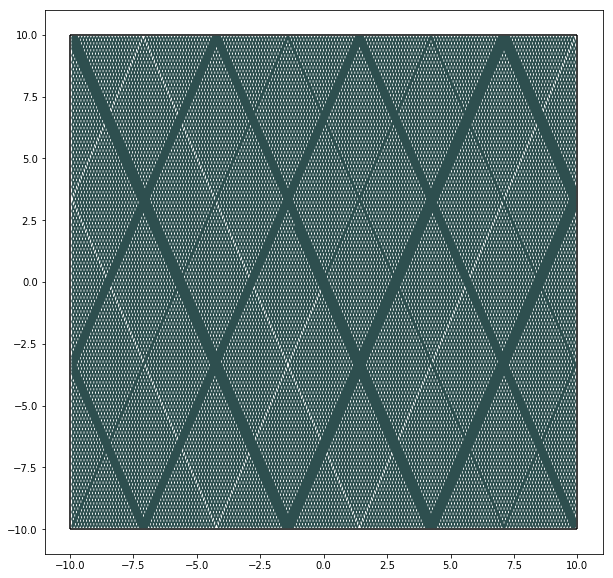

In [2]:
class Billiard:
    '''class describing a Billiard Ball'''
    def __init__(self, x, y, t, vx, vy, b_x, b_y, color):# defining the parameters of the class
        self._x = x #initial x of the Billiard
        self._y = y #initial y of the Billiard
        self._t = t #initial time of the Billiard
        self._vx = vx
        self._vy = vy
        self._b_x = b_x
        self._b_y = b_y
        self.x_data = []
        self.y_data = []
        self._color = color
    
    def boundary_check(self):
        if (self._b_y - 0.1) < self._y < (self._b_y + 0.1) or  (-self._b_y - 0.1) < self._y < (-self._b_y + 0.1):
            self._vy = -self._vy
            self._color[0] = self._color[0] + 0.1 
        if (self._b_x - 0.1) < self._x < (self._b_x + 0.1) or (-self._b_x - 0.1) < self._x < (-self._b_x + 0.1):
            self._vx = -self._vx
            self._color[1] = self._color[1] + 0.1
                
    def start(self):
        max_time = 100000
        time_step = 1
        self.x_data.append(self._x)
        self.y_data.append(self._y)
        while self._t < max_time:
            self._x = self._x + self._vx
            self._y = self._y + self._vy
            self.x_data.append(self._x)
            self.y_data.append(self._y)
            self._t = self._t + time_step
            self.boundary_check()

            
my_glass_billiard = Billiard(0,0,0,0.03,0.07,10,10,[.18, .31, .31])
my_glass_billiard.start()

color = [.18, .31, .31]
plt.figure(figsize = (10,10))
plt.plot(my_glass_billiard.x_data, my_glass_billiard.y_data, color = color)
plt.hlines(my_glass_billiard._b_y,-my_glass_billiard._b_x,my_glass_billiard._b_x)
plt.hlines(-my_glass_billiard._b_y,-my_glass_billiard._b_x,my_glass_billiard._b_x)
plt.vlines(my_glass_billiard._b_x,-my_glass_billiard._b_y,my_glass_billiard._b_y)
plt.vlines(-my_glass_billiard._b_x,-my_glass_billiard._b_y,my_glass_billiard._b_y)

    


In [3]:
color = [.18, .31, .31]
# print(color + 0.01)
t = 1 
while t < 10:
    color[0] = color[0] + 0.01
    print(color)
    t = t + 1

[0.19, 0.31, 0.31]
[0.2, 0.31, 0.31]
[0.21000000000000002, 0.31, 0.31]
[0.22000000000000003, 0.31, 0.31]
[0.23000000000000004, 0.31, 0.31]
[0.24000000000000005, 0.31, 0.31]
[0.25000000000000006, 0.31, 0.31]
[0.26000000000000006, 0.31, 0.31]
[0.2700000000000001, 0.31, 0.31]


[[0. 0.]
 [0. 0.]
 [0. 0.]
 ...
 [0. 0.]
 [0. 0.]
 [0. 0.]]
[[ 0.03  0.07]
 [ 0.06  0.14]
 [ 0.09  0.21]
 ...
 [-1.08  2.1 ]
 [-1.11  2.17]
 [-1.14  2.24]]


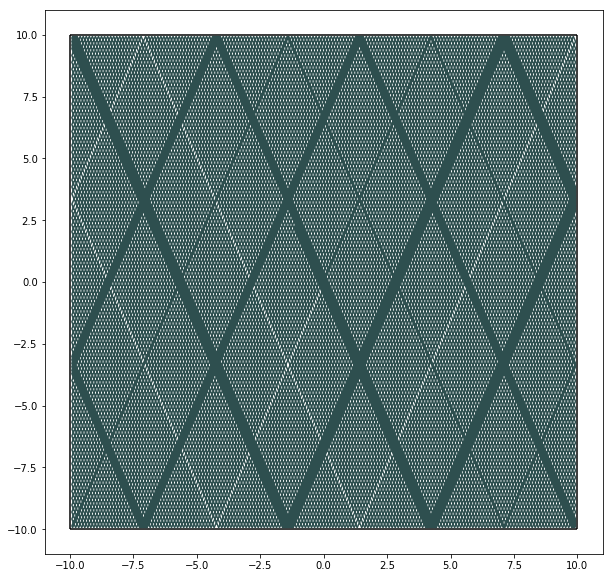

In [68]:
class Billiard:
    '''class describing a Billiard Ball'''
    def __init__(self, x, y, t, vx, vy, b_x, b_y):# defining the parameters of the class
        self._pos = [x,y] #initial x of the Billiard and initial y of the Billiard
        self._max_time = t #initial time of the Billiard
        self._vel = [vx,vy]
        self._b_x = b_x
        self._b_y = b_y
        self.pos_data = np.empty((t, 2))
        self.pos_data[0,:] = np.array([0,0])
        print(self.pos_data)
    
    def boundary_check(self):
        if (self._b_y - 0.1) < self._pos[1] < (self._b_y + 0.1) or (-self._b_y - 0.1) < self._pos[1] < (-self._b_y + 0.1):
            self._vel[1] = -self._vel[1] 
        if (self._b_x - 0.1) < self._pos[0] < (self._b_x + 0.1) or (-self._b_x - 0.1) < self._pos[0] < (-self._b_x + 0.1):
            self._vel[0] = -self._vel[0]
                
    def start(self):
        time_step = 1
        t = 0
        while t < self._max_time:
            self._pos[0] = self._pos[0] + self._vel[0]
            self._pos[1] = self._pos[1] + self._vel[1]
            self.pos_data[t,0] = self._pos[0]
            self.pos_data[t,1] = self._pos[1]
            t = t + time_step
            self.boundary_check()

            
my_glass_billiard = Billiard(0,0,100000,0.03,0.07,10,10)
my_glass_billiard.start()

color = [.18, .31, .31]
plt.figure(figsize = (10,10))
print(my_glass_billiard.pos_data)
plt.plot(my_glass_billiard.pos_data[:,0], my_glass_billiard.pos_data[:,1], color = color)
plt.hlines(my_glass_billiard._b_y,-my_glass_billiard._b_x,my_glass_billiard._b_x)
plt.hlines(-my_glass_billiard._b_y,-my_glass_billiard._b_x,my_glass_billiard._b_x)
plt.vlines(my_glass_billiard._b_x,-my_glass_billiard._b_y,my_glass_billiard._b_y)
plt.vlines(-my_glass_billiard._b_x,-my_glass_billiard._b_y,my_glass_billiard._b_y)

    

[-10.       -9.99998  -9.99996 ...  -9.99996  -9.99998 -10.     ]
[ 0.          0.02        0.02828426 ... -0.02828426 -0.02
  0.        ]


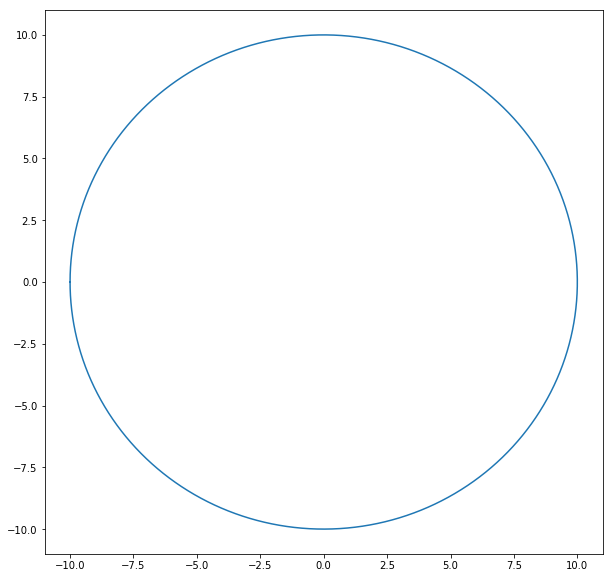

In [123]:
def circle_y(x,h,k,r):
    size = np.size(x)
    z = size/2
    z = int(z)
    x_1 = x[:z]
    x_2 = x[z:]
    y_1 = +np.sqrt(r**2 -(x_1-h)**2) + k
    y_2 = -np.sqrt(r**2 -(x_2-h)**2) + k
    y = np.concatenate((y_1, y_2), axis=None)
    return y
r = 10
x_1 = np.linspace(-r,r,1000000)
x_2 = np.linspace(r,-r,1000000)
b_x = np.concatenate((x_1, x_2), axis=None)
b_y = circle_y(b_x,0,0,10)
# print(y)
plt.figure(figsize=(10,10))
plt.plot(b_x,b_y)
# b_xy = np.dstack((b_x,b_y))

# u = []
# for i in b_x,b_y:
#     z = [int(b_x[i]),int(b_y[i])]
#     u.append(z)
print(b_x)
print(b_y)
list(zip(b_x, b_y))
l, o = np.mgrid[:len(b_x), 2:8]
v = spatial.KDTree(list(zip(b_x, b_y)))
j = v.data
#print(j)
pts = np.array([[-10,0]])
v_1 = v.query(pts)
# print(v_1)
#refernce the cell below as well for the nearest neighbour stuff
#then interpolate between the next nearest neigbour and then find the derivative and then find the normal as 

In [128]:
#any random point i want ro find neasrst neigbour of 
pts = np.array([[7.5,7.5]])
v_1 = v.query(pts)
print(v_1)
b = list(zip(b_x, b_y))
#array of distance between the the specified point and index of the nearst neigbour 
# b[83975]
         

(array([0.60660172]), array([853553]))


(-8.32049832049832, 5.547008896566206)

In [ ]:
class Billiard:
    '''class describing a Billiard Ball'''
    def __init__(self, x, y, t, vx, vy, b_x, b_y):# defining the parameters of the class
        self._pos = [x,y] #initial x of the Billiard and initial y of the Billiard
        self._max_time = t #initial time of the Billiard
        self._vel = [vx,vy]
        self._b_x = b_x
        self._b_y = b_y
        self.pos_data = np.empty((t, 2))
        self.pos_data[0,:] = np.array([0,0])
        print(self.pos_data)
    
    def boundary_check(self):
        r = 10
        if r - 0.1 < ((self._pos[0] - self.pos_data[0,0])**2 + (self._pos[1] - self.pos_data[0,1])**2) < r + 0.1:
            closest = 
                
    def start(self):
        time_step = 1
        t = 0
        while t < self._max_time:
            self._pos[0] = self._pos[0] + self._vel[0]
            self._pos[1] = self._pos[1] + self._vel[1]
            self.pos_data[t,0] = self._pos[0]
            self.pos_data[t,1] = self._pos[1]
            t = t + time_step
            self.boundary_check()

            
my_glass_billiard = Billiard(0,0,100000,0.03,0.07,10,10)
my_glass_billiard.start()

color = [.18, .31, .31]
plt.figure(figsize = (10,10))
print(my_glass_billiard.pos_data)
plt.plot(my_glass_billiard.pos_data[:,0], my_glass_billiard.pos_data[:,1], color = color)
# plt.hlines(my_glass_billiard._b_y,-my_glass_billiard._b_x,my_glass_billiard._b_x)
# plt.hlines(-my_glass_billiard._b_y,-my_glass_billiard._b_x,my_glass_billiard._b_x)
# plt.vlines(my_glass_billiard._b_x,-my_glass_billiard._b_y,my_glass_billiard._b_y)
# plt.vlines(-my_glass_billiard._b_x,-my_glass_billiard._b_y,my_glass_billiard._b_y)

                
    def start(self):
        time_step = 1
        t = 0
        while t < self._max_time:
            self._pos[0] = self._pos[0] + self._vel[0]
            self._pos[1] = self._pos[1] + self._vel[1]
            self.pos_data[t,0] = self._pos[0]
            self.pos_data[t,1] = self._pos[1]
            t = t + time_step
            self.boundary_check()

            
my_glass_billiard = Billiard(0,0,100000,0.03,0.07,b_x,b_y)
my_glass_billiard.start()

color = [.18, .31, .31]
plt.figure(figsize = (10,10))
print(my_glass_billiard.pos_data)
plt.plot(my_glass_billiard.pos_data[:,0], my_glass_billiard.pos_data[:,1], color = color)
# plt.hlines(my_glass_billiard._b_y,-my_glass_billiard._b_x,my_glass_billiard._b_x)
# plt.hlines(-my_glass_billiard._b_y,-my_glass_billiard._b_x,my_glass_billiard._b_x)
# plt.vlines(my_glass_billiard._b_x,-my_glass_billiard._b_y,my_glass_billiard._b_y)
# plt.vlines(-my_glass_billiard._b_x,-my_glass_billiard._b_y,my_glass_billiard._b_y)


In [122]:
import scipy
scipy.__version__

'1.2.1'

In [5]:
np.any(np.array((1.0,2.9)) == (1.0, 2.0))

np.any(np.array((self._x, self._y)) == (b_x, b_y)):
            self.collision(angle)
        
                theta_i = np.pi/2 - self._angle  
            theta_r = theta_i
            self._angle = 3*np.pi/2 + theta_r 
            self._x = v*np.cos(self._angle)*t
            self._y = v*np.sin(self._angle)*t
            
        
        
        #theta_i = np.arctan(self._y/self._x)
        #theta_r = theta_i
        #self._x = 0 #initial x of the Billiard
        #self._y = 0 #initial y of the Billiard
        
        
# fig = plt.figure(figsize = )
# ax = fig.add_subplot(111, aspect='equal')
# ax.fill(x, y, alpha=0.2, facecolor='yellow',
#         edgecolor='yellow', linewidth=1, zorder=1)

# # e1 = patches.Ellipse((xcenter, ycenter), width, height,
# #                      angle=angle, linewidth=2, fill=False, zorder=2)

# xy = (0,0)
# test = patches.Circle(xy, radius=10)
# ax.add_patch(test)
# ax.set_ylim(-10,10)
# # ax.add_patch(e1)
    

SyntaxError: invalid syntax (<ipython-input-5-59b00c8368fa>, line 3)

In [ ]:
"A simple example of an animated plot"
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig, ax = plt.subplots()

x = np.arange(0, 2*np.pi, 0.01)
line, = ax.plot(x, np.sin(x))


def animate(i):
    line.set_ydata(np.sin(x + i/10.0))  # update the data
    return line,


# Init only required for blitting to give a clean slate.
def init():
    line.set_ydata(np.ma.array(x, mask=True))
    return line,

ani = animation.FuncAnimation(fig, animate, np.arange(1, 200), init_func=init,
                              interval=25, blit=True)
plt.show()